In [1]:
# Take out heat water usage data

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import time

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
file = '''RPT1106_data_all.csv'''
data = pd.read_csv(file)
data.head()

,timestamp,temperature,power,counter,time
0,1647996161095,60.6,0.0,0.0,14200.0
1,1647996221095,60.6,0.0,1.0,14300.0
2,1647996281095,60.6,0.0,2.0,14400.0
3,1647996341095,60.6,0.0,3.0,14500.0
4,1647996401095,60.6,0.0,4.0,14600.0


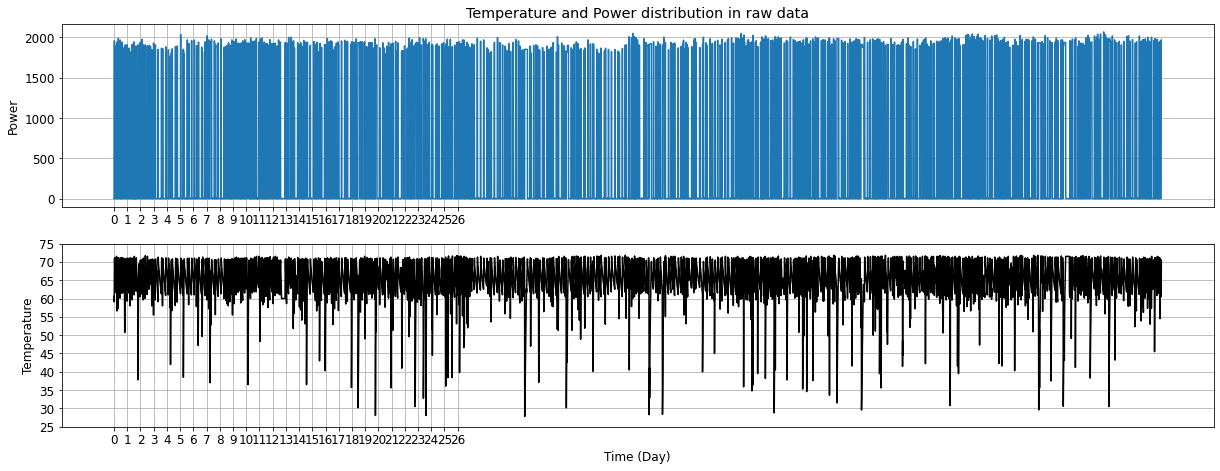

In [5]:
plt.rcParams.update({'font.size': 12})
fig, (ax1, ax2) = plt.subplots(2, gridspec_kw=dict(left=0.1, right=0.9,
                                        bottom=0.1, top=0.9), figsize=(20, 7))
ax1.set_title("Temperature and Power distribution in raw data")

x = [i/(60*24) for i in range(len(data.power))]

ax1.plot(x, data.power, '-', label='Power')
ax1.set_xticks(np.arange(0, 27, 1))
ax1.set_ylabel('Power')
ax1.grid()

ax2.plot(x, data.temperature, 'k-', label='Temperature')
ax2.set_xticks(np.arange(0, 27, 1))
ax2.set_yticks(np.arange(25, 76, 5))
ax2.set_xlabel('Time (Day)')
ax2.set_ylabel('Temperature')
ax2.grid()

plt.show()

In [6]:
data.reset_index(inplace=True)
data.head()

,index,timestamp,temperature,power,counter,time
0,0,1647996161095,60.6,0.0,0.0,14200.0
1,1,1647996221095,60.6,0.0,1.0,14300.0
2,2,1647996281095,60.6,0.0,2.0,14400.0
3,3,1647996341095,60.6,0.0,3.0,14500.0
4,4,1647996401095,60.6,0.0,4.0,14600.0


In [7]:
for index, row in data.iterrows():
    expectedTemp = data[data.index== index-2]
    expectedTemp = expectedTemp.temperature.values[0] if(len(expectedTemp.temperature.values))>0 else 0
    if(expectedTemp - row.temperature > 0.65 ):
        data.loc[index-2, 'water_tap'] = 1
        data.loc[index-1, 'water_tap'] = 1
        data.loc[index, 'water_tap'] = 1
    else:
        data.loc[index, 'water_tap'] = 0

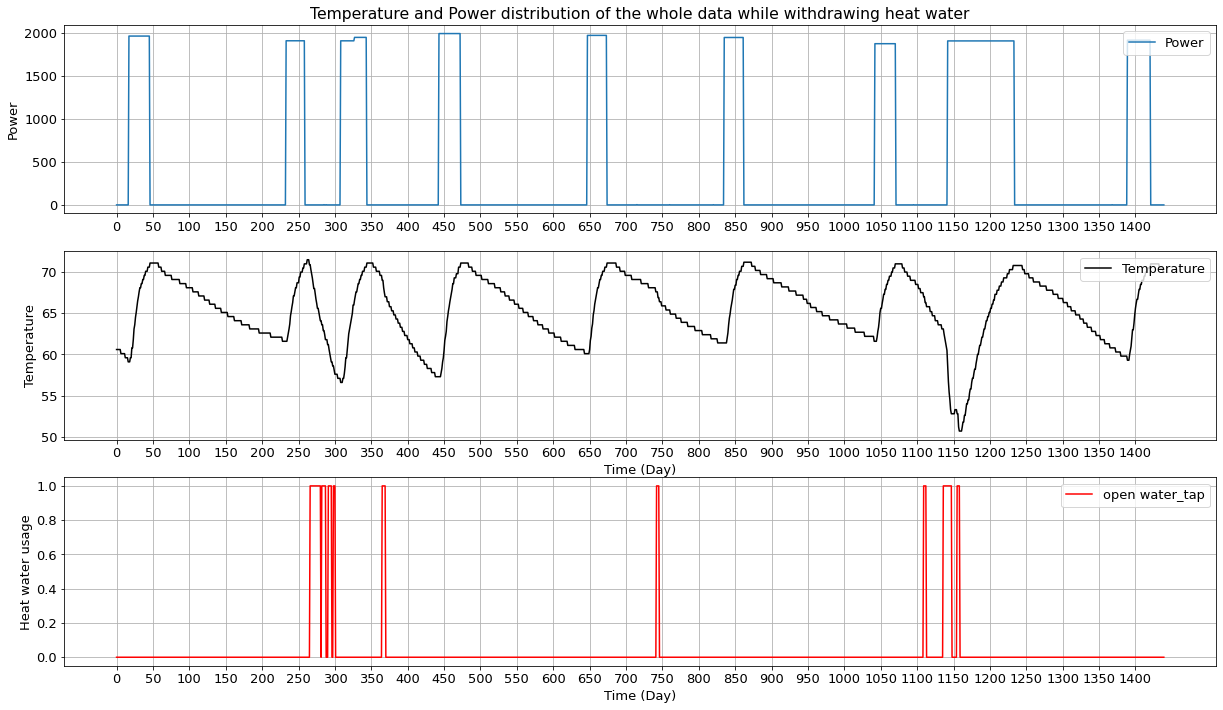

In [8]:
plt.rcParams.update({'font.size': 13})
fig, (ax1, ax2, ax3) = plt.subplots(3, gridspec_kw=dict(left=0.1, right=0.9,
                                        bottom=0.01, top=0.9), figsize=(20, 10))

ax1.set_title("Temperature and Power distribution of the whole data while withdrawing heat water")

x = [i/(60*24) for i in range(len(data.power))]
x = [i for i in range(len(data.power[0:1440]))]

ax1.plot(x, data.power[0:1440], '-', label='Power')
ax1.set_xticks(np.arange(0, 1441, 50))
ax1.set_ylabel('Power')
ax1.grid()
ax1.legend(loc="upper right")

ax2.plot(x, data.temperature[0:1440], 'k-', label='Temperature')
ax2.set_xticks(np.arange(0, 1441, 50))
ax2.set_xlabel('Time (Day)')
ax2.set_ylabel('Temperature')
ax2.legend(loc="upper right")
ax2.grid()

ax3.plot(x, data.water_tap[0:1440], 'r-', label='open water_tap')
ax3.set_xticks(np.arange(0, 1441, 50))
ax3.set_xlabel('Time (Day)')
ax3.set_ylabel('Heat water usage')
ax3.legend(loc="upper right")
ax3.grid()

plt.show()

In [9]:
increasing = True
usedheatwater = False
dct = {}
peakindex = 0
peak = 70

for index, row in data.iterrows():
    if(data.loc[index, 'temperature'] > peak):
        peak = data.loc[index, 'temperature']        
        peakindex = index
        usedheatwater = False
        continue
    elif(data.loc[index, 'temperature'] < 70):
        peak = 70
        if(dct.get(peakindex, None) == None):
            dct[peakindex] = False
        
        if(data.loc[index, 'water_tap'] == 1 and dct[peakindex] == False):
            dct[peakindex] = True

tempdata = data[:0]
lastindex = -1
jump = False

for k, v in dct.items():
    if(jump == True):
        lastindex= k
        jump = v
    else:
        tempdata = tempdata.append(data[lastindex:k])
        lastindex = k
        jump = v

In [10]:
tempdata.shape, data.shape

((43639, 7), (114120, 7))

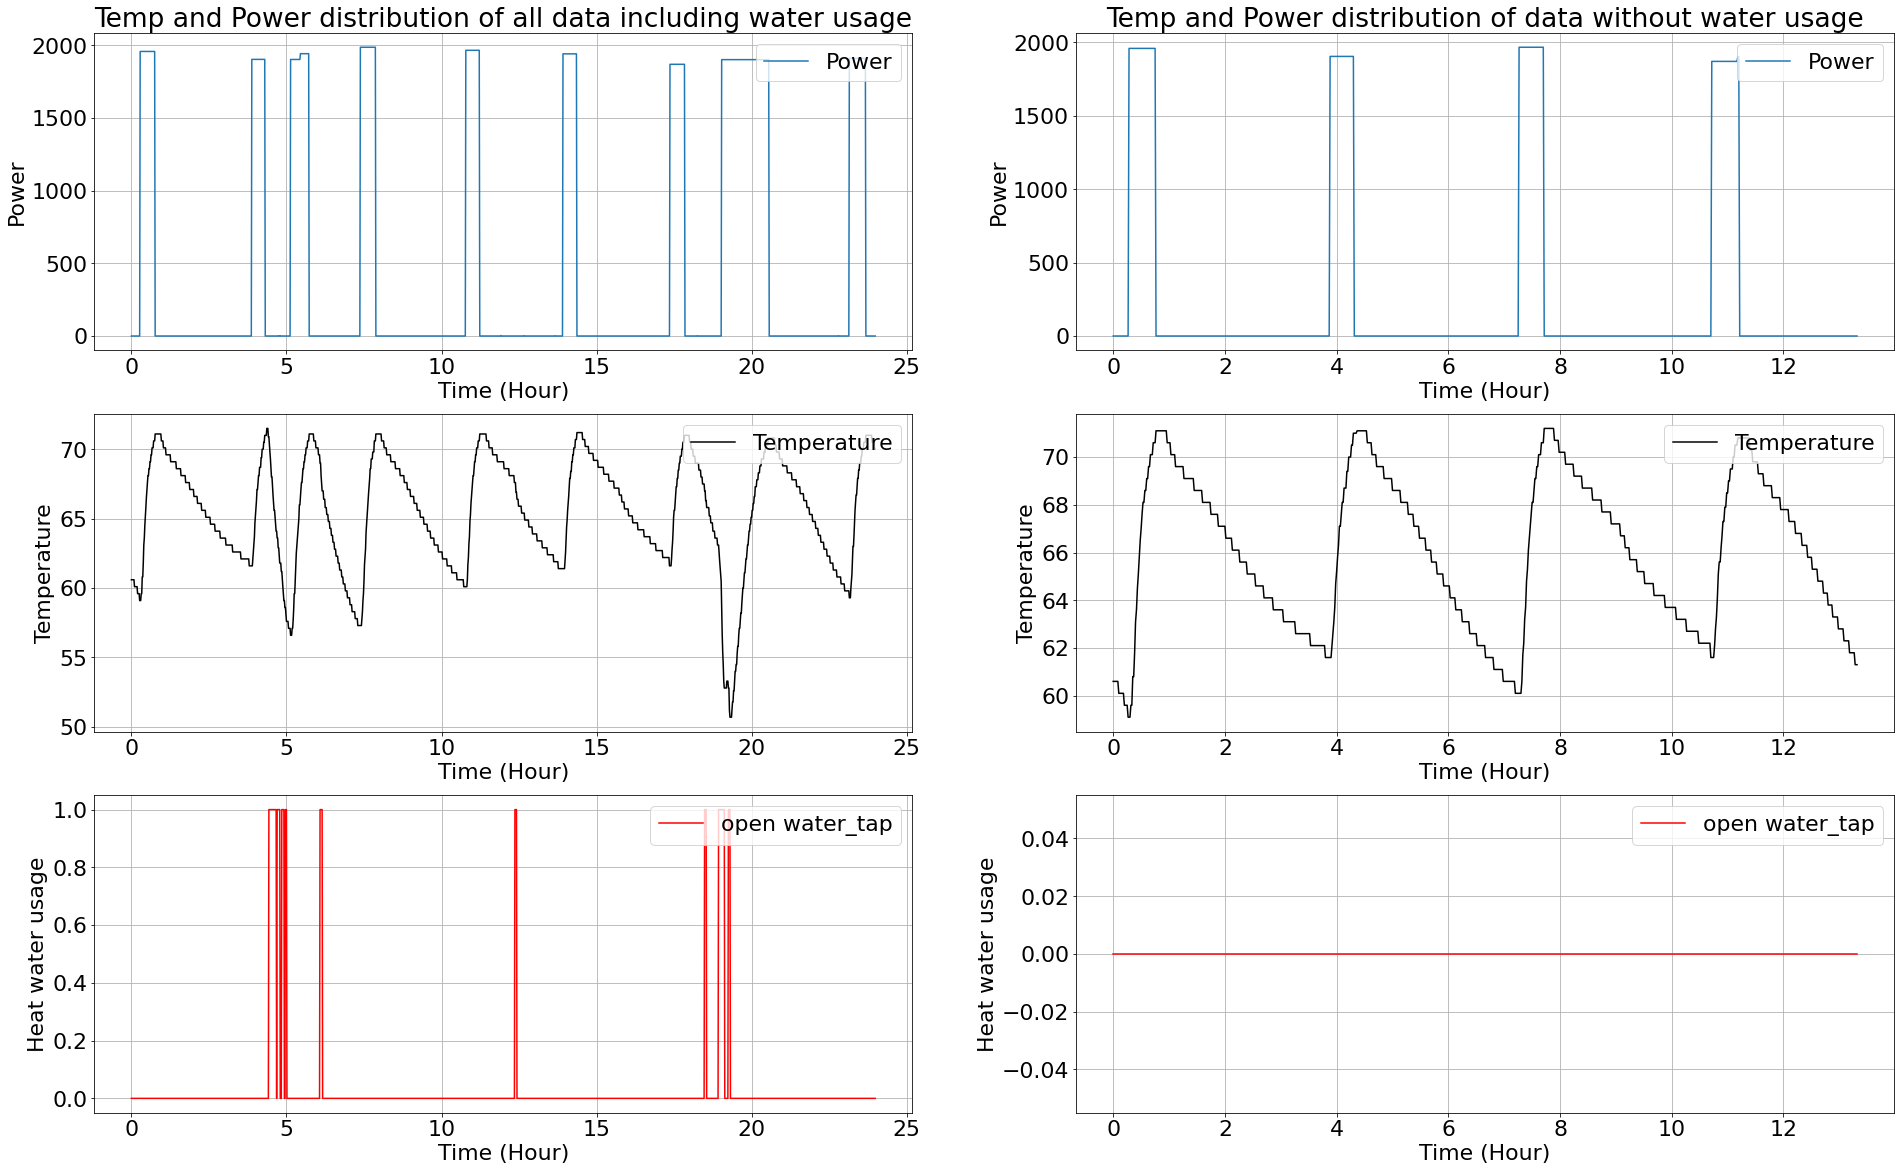

In [11]:
plt.rcParams.update({'font.size': 22})
fig, ((ax1, ax4),(ax2, ax5),(ax3, ax6)) = plt.subplots(3,2, gridspec_kw=dict(left=0, right=1,
                                        bottom=0, top=1.5), figsize=(25, 10))

ax1.set_title("Temp and Power distribution of all data including water usage")

x = [i/60 for i in range(len(data.power[0:1440]))]
# x = [i for i in range(len(data.power[0:1440]))]

ax1.plot(x, data.power[0:1440], '-', label='Power')
# ax1.set_xticks(np.arange(0, 24, 2))
ax1.set_ylabel('Power')
ax1.set_xlabel('Time (Hour)')
ax1.grid()
ax1.legend(loc="upper right")

ax2.plot(x, data.temperature[0:1440], 'k-', label='Temperature')
# ax2.set_xticks(np.arange(0, 24, 2))
ax2.set_xlabel('Time (Hour)')
ax2.set_ylabel('Temperature')
ax2.legend(loc="upper right")
ax2.grid()

ax3.plot(x, data.water_tap[0:1440], 'r-', label='open water_tap')
# ax3.set_xticks(np.arange(0, 24, 2))
ax3.set_xlabel('Time (Hour)')
ax3.set_ylabel('Heat water usage')
ax3.legend(loc="upper right")
ax3.grid()


ax4.set_title("Temp and Power distribution of data without water usage")

x = [i/60 for i in range(len(tempdata.power[0:800]))]
# x = [i for i in range(len(tempdata.power[0:800]))]

ax4.plot(x, tempdata.power[0:800], '-', label='Power')
# ax1.set_xticks(np.arange(1, 41, 1))
ax4.set_xlabel('Time (Hour)')
ax4.set_ylabel('Power')
ax4.legend(loc="upper right")
ax4.grid()

ax5.plot(x, tempdata.temperature[0:800], 'k-', label='Temperature')
# ax2.set_xticks(np.arange(0, 41, 1))
# ax2.set_yticks(np.arange(40, 70, 1))
ax5.set_xlabel('Time (Hour)')
ax5.set_ylabel('Temperature')
ax5.legend(loc="upper right")
ax5.grid()

ax6.plot(x, tempdata.water_tap[0:800], 'r-', label='open water_tap')
# ax2.set_xticks(np.arange(0, 41, 1))
# ax2.set_yticks(np.arange(40, 70, 1))
ax6.set_xlabel('Time (Hour)')
ax6.set_ylabel('Heat water usage')
ax6.legend(loc="upper right")
ax6.grid()

plt.show()

In [14]:
tempdata.index = tempdata.timestamp
tempdata = tempdata[['temperature', 'power', 'counter', 'time']]
file = '''RPT1106_nowaterusage.csv'''
tempdata.to_csv(file)